## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

In [4]:
# uncomment this cell if you want to train this model yourself
'''
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
'''

'\nbatch_size = 128\nepochs = 15\n\nmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])\n\nmodel.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)\n'

## Evaluate the trained model

In [5]:
from keras.models import load_model
# Uncomment the line below to save your trained model
#model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
     
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022820105776190758
Test accuracy: 0.9925000071525574


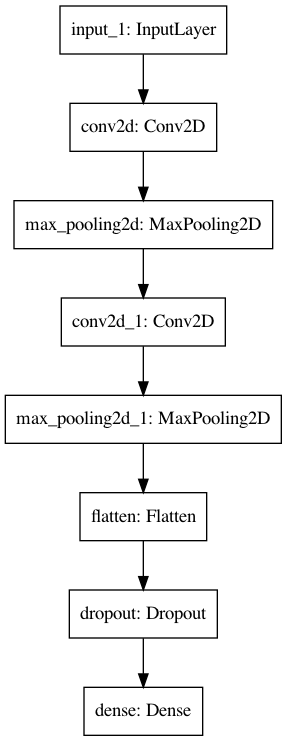

In [7]:
from keras.utils import plot_model    # you need pydot and graphviz for this
plot_model(model, to_file='mnist_convnet.png')

In [8]:
def vis_weights1_2():
    a = model.weights[0]
    grid = plt.GridSpec(8, 5, wspace=0.4, hspace=0.3)
    fig, ax = plt.subplots(8, 4, figsize=(2.75, 5))
    fig.set(facecolor='orange')
    for i in range(8):
        for j in range(4):
            ax[i, j] = plt.subplot(grid[i, j])
            ax[i, j].yaxis.set_major_locator(plt.NullLocator())
            ax[i, j].xaxis.set_major_formatter(plt.NullFormatter())
            ax[i, j].imshow(a[:, :, :, i+j], cmap='gray')
    fig.suptitle('Weights And Biases Of conv2d', fontsize=12, color='blue')
    ax[0, 1].title.set_text("Weights")
    ax[0, 1].title.set_color('green')
    b = model.weights[1]
    b = np.expand_dims(b, axis=1)
    ax = fig.add_subplot(grid[:, -1])
    ax.set_title("Bias", c='green')
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.imshow(b, cmap='gray')
    fig.savefig('weights1_biases1')
    
#vis_weights1_2()    # uncomment this line if you need to see your trained model's first conv layer's weights and biases

In [9]:
def vis_weights3_4():
    a = model.weights[2]
    fig = plt.figure(figsize=(15, 15))
    fig.suptitle("\nWeights And Biases of conv2d_1", fontsize=24, color='blue')
    fig.set(facecolor='orange')
    grid = plt.GridSpec(34, 64)
    for i in range(32):
        for j in range(64):
            tmp_ax = fig.add_subplot(grid[i, j])
            filler_upper = a[:, :, i, j]
            tmp_ax.imshow(filler_upper, cmap='gray')
            tmp_ax.yaxis.set_major_locator(plt.NullLocator())
            tmp_ax.xaxis.set_major_formatter(plt.NullFormatter())
    fig.text(0.5, 0.9, "Weights", c='green')
    b = np.expand_dims(model.weights[3], axis=0)
    tmp_ax = fig.add_subplot(grid[-1, :])
    tmp_ax.set_title("Biases", c='green')
    tmp_ax.imshow(b, cmap='gray')
    tmp_ax.yaxis.set_major_formatter(plt.NullFormatter())
    fig.savefig('weights2_biases2')
    

#vis_weights3_4()    # uncomment this line if you need to see your trained model's second conv layer's weights and biases

In [10]:
def vis_weights4_5():
    a = model.weights[4]
    a = np.expand_dims(a, axis=-1).T
    b = model.weights[5]
    b = np.expand_dims(b, axis=-1).T
    grid1 = plt.GridSpec(2, 1600)
    grid2 = plt.GridSpec(2, 10)
    for i in range(10):
        fn = 'templates/'
        fig = plt.figure(figsize=(100, 1))
        fig.set(facecolor='orange')
        ax = fig.add_subplot(grid1[0, :])
        ax.yaxis.set_major_locator(plt.NullLocator())
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        ax.imshow(a[:, i], cmap='gray')
        fn += str(i)
        fig.savefig(fn)
    fig = plt.figure(figsize=(10, 1))
    ax = fig.add_subplot(grid2[-1, :])
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.imshow(b, cmap='gray')
    fig.savefig('bias3')
    
#vis_weights4_5()    # uncomment this line if you need to see your trained dense layer weights and biases

In [11]:
for i in range(len(model.layers)):
    print(model.layers[i].output.shape)

(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 11, 11, 64)
(None, 5, 5, 64)
(None, 1600)
(None, 1600)
(None, 10)


In [12]:
import random
from keras.models import Model

def helper(digit, data):
    idx = np.expand_dims(np.argmax(data, axis=-1), axis=-1)
    idx = ((idx == digit).nonzero())[0]
    idx = idx[random.randint(0, (len(idx) - 1))]
    return idx

class vis_model_output_stuff:
    
    def __init__(self, test_data=True, digit=None):
        if test_data == True:
            if digit == None:
                self.idx = random.randint(0, (len(x_test) - 1))
            else:
                self.idx = helper(digit, y_test)
            self.input_img = x_test[self.idx]
            self.label = y_test[self.idx]
        else:
            if digit == None:
                self.idx = random.randint(0, (len(x_train) - 1))
            else:
                self.idx = helper(digit, y_test)
            self.input_img = x_train[self.idx]
            self.label = y_train[self.idx]
        
        self.digit = np.argmax(self.label)
        self.times = np.expand_dims(self.input_img, axis=0)
        self.final_output = model.predict(self.times)
        self.y_hat = np.argmax(self.final_output)
        
    def vis_input_and_output(self):
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(self.input_img, cmap='gray')
        ax.set_title("The Digit is a " + str(self.digit) + ".", c='blue')
        fig.set_facecolor('orange')
        fig.savefig('input_img')
        plt.show()
        tmp = np.expand_dims(self.input_img, axis=0)
        plt.clf()
        test_out = model.predict(self.times)
        y_hat = np.argmax(test_out)
        fig = plt.figure(figsize=(5, 2))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title("White means a higher probability. " + \
                  "Black means a lower probability\n The model has predicted a " + \
                  str(y_hat) + '.', c='blue')
        
        ax.imshow(test_out, cmap='gray')
        fig.set_facecolor('orange')
        fig.savefig('final_out')
        
    def vis_conv2d_output(self, first=True):
        if first == True:
            self.tmpo = model.layers[0].output
            self.info1 = (15, 8)
            self.info2, self.info3 = 4, 8
        else:
            self.tmpo = model.layers[2].output
            self.info1 = (9, 8)
            self.info2, self.info3 = 8, 8
        tmp = Model(inputs=model.inputs, outputs=self.tmpo)
        self.tmpi = tmp.inputs
        out = tmp.predict(self.times);
        fig = plt.figure(figsize=self.info1)
        grid = plt.GridSpec(self.info2, self.info3)
        fig.suptitle("\nOutputs of conv2d", fontsize=24, color='blue')
        fig.set(facecolor='orange')
        for i in range(self.info2):
            for j in range(self.info3):
                tmp_ax = fig.add_subplot(grid[i, j])
                tmp_ax.imshow(out[0, :, :, i+j], cmap='gray')
                tmp_ax.yaxis.set_major_locator(plt.NullLocator())
                tmp_ax.xaxis.set_major_formatter(plt.NullFormatter())
        if first == True:
            fig.savefig('out_conv2d')
        else:
            fig.savefig('out_conv2d_1')
        
    def vis_max_pooling2d_output(self, first=True):
        if first == True:
            self.tmpo = model.layers[1].output
        else:
            self.tmpo = model.layers[3].output
        tmp = Model(inputs=self.tmpi, outputs=self.tmpo)
        self.tmpi = tmp.inputs
        out = tmp.predict(self.times);
        fig = plt.figure(figsize=self.info1)
        grid = plt.GridSpec(self.info2, self.info3)
        fig.suptitle("\nOutputs of max_pooling2d", fontsize=24, color='blue')
        fig.set(facecolor='orange')
        for i in range(self.info2):
            for j in range(self.info3):
                tmp_ax = fig.add_subplot(grid[i, j])
                tmp_ax.imshow(out[0, :, :, i+j], cmap='gray')
                tmp_ax.yaxis.set_major_locator(plt.NullLocator())
                tmp_ax.xaxis.set_major_formatter(plt.NullFormatter())
        if first == True:
            fig.savefig('out_max_pooling2d')
        else:
            fig.savefig('out_max_pooling2d_1')
            
    def vis_last_outputs(self):
        self.tmpo = model.layers[5].output
        tmp = Model(inputs=self.tmpi, outputs=self.tmpo)
        self.tmpi = tmp.inputs
        out = tmp.predict(self.times);
        grid = plt.GridSpec(2, 1600)
        fig = plt.figure(figsize=(100, 1))
        fig.set(facecolor='orange')
        ax = fig.add_subplot(grid[-1, :])
        ax.yaxis.set_major_locator(plt.NullLocator())
        ax.xaxis.set_major_formatter(plt.NullFormatter())
        ax.set_title("Outputs of Flatten + Dropout", c='blue')
        ax.imshow(out, cmap='gray')
        fig.savefig('last_outputs')

Visualizing the Train Data


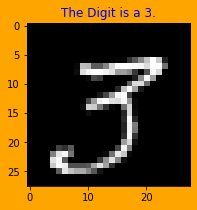

<Figure size 432x288 with 0 Axes>

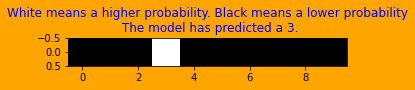

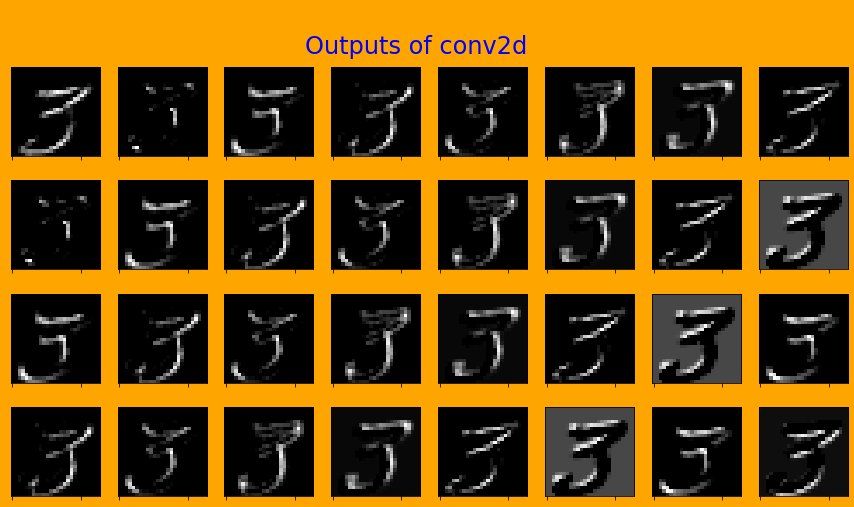

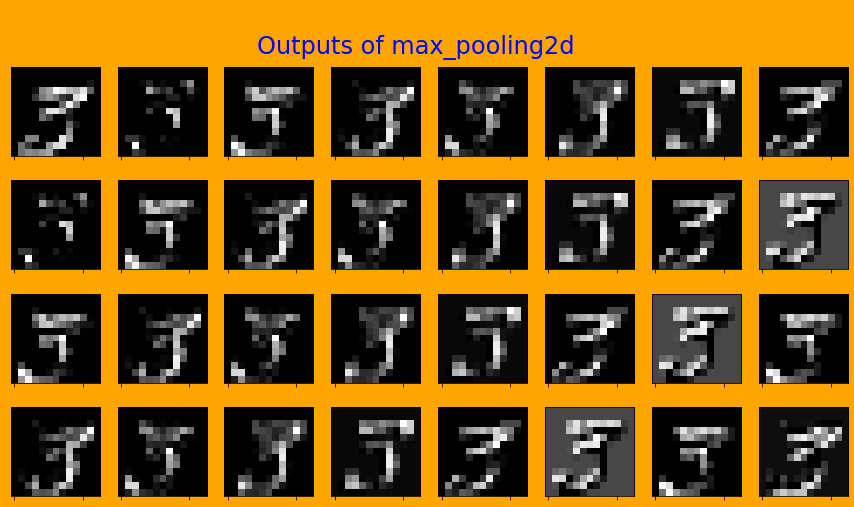

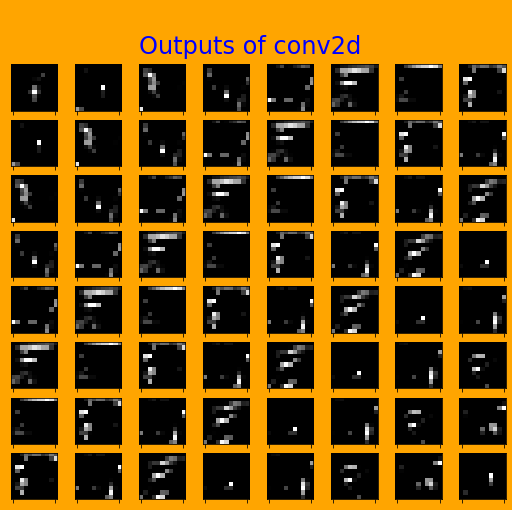

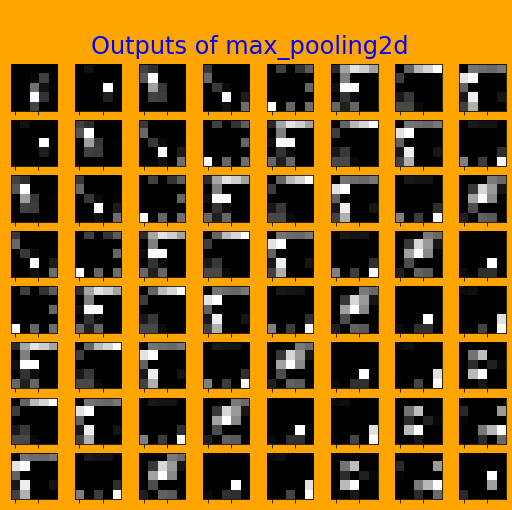

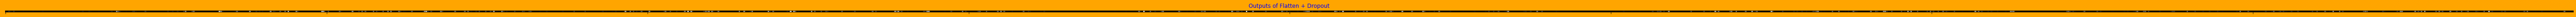

In [13]:
# Train Data Visualization -- It is OKAY if tensorflow starts giving warnings, ignore them
print("Visualizing the Train Data")
visualizer = vis_model_output_stuff(test_data=False, digit=None)    # if you want, change digit to a digit you want to be visulizing on
visualizer.vis_input_and_output()
visualizer.vis_conv2d_output()
visualizer.vis_max_pooling2d_output()
visualizer.vis_conv2d_output(first=False)
visualizer.vis_max_pooling2d_output(first=False)
visualizer.vis_last_outputs()

Visualizing the Test Data


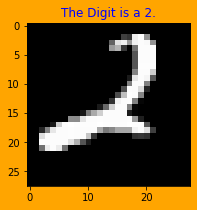

<Figure size 432x288 with 0 Axes>

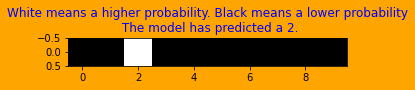

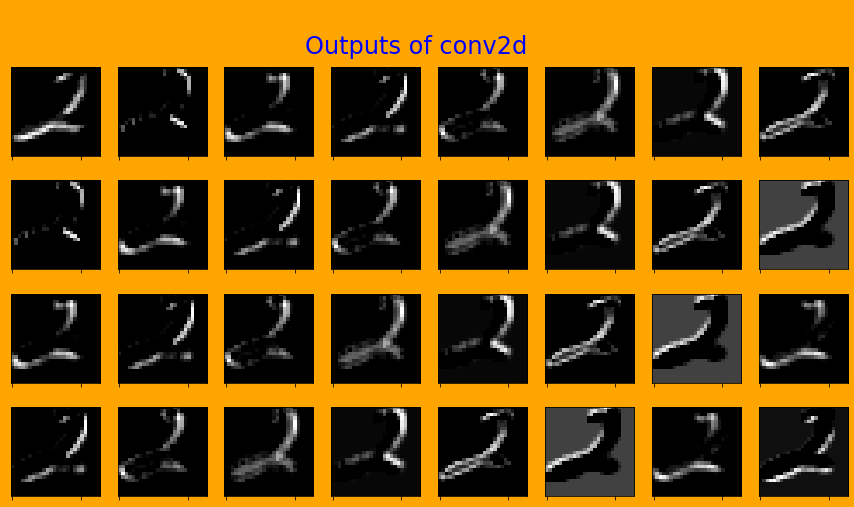

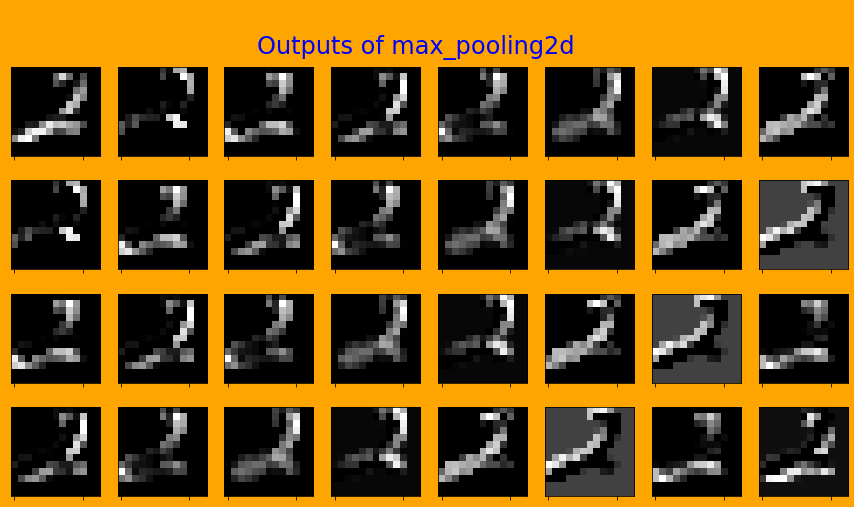

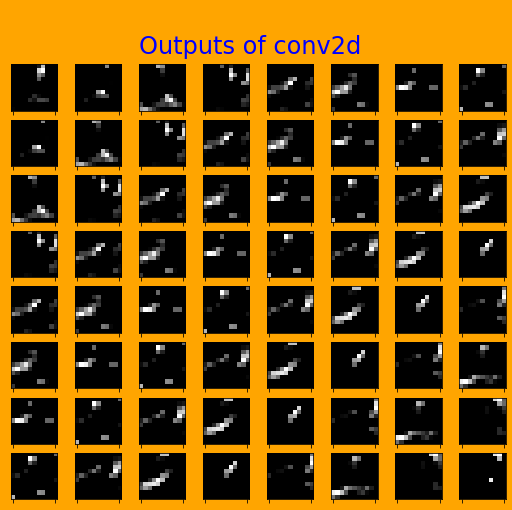

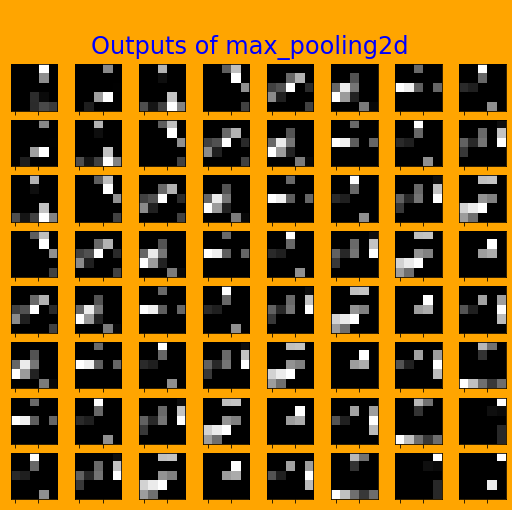

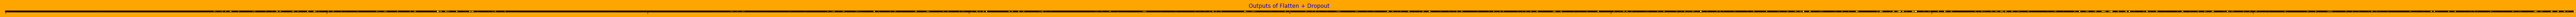

In [14]:
# Test Data Visualization -- It is OKAY if tensorflow starts giving warnings, ignore them
print("Visualizing the Test Data")
visualizer = vis_model_output_stuff(test_data=True, digit=None)    # if you want, change digit to a digit you want to be visulizing on
visualizer.vis_input_and_output()
visualizer.vis_conv2d_output()
visualizer.vis_max_pooling2d_output()
visualizer.vis_conv2d_output(first=False)
visualizer.vis_max_pooling2d_output(first=False)
visualizer.vis_last_outputs()